### Data augmentation and Preprocessing

This notebook will:
- Load FER, Muxspace, and KDEF datasets
- Split the above 3 datasets into training, validation, and testing sets (results in 9 sets total)
- Save the 3 training sets into one folder
- Save the 3 validation sets into one folder
- Save the 3 testing sets into one folder
- Save the 3 testing sets into 3 separate folders (There will be 4 testing folders: test, fer_test, mux_test, kdef_test)

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt
import math

import preprocess as p

#### Load data
- Remove disgust because too less data

In [2]:
fer  = pd.read_csv("../datasets/FER_dataset/icml_face_data.csv", usecols=["emotion", " pixels"])
mux  = pd.read_csv("../datasets/MuxspaceDataset/data/new_legend.csv", usecols=["emotion", "image"])
kdef = p.get_KDEF_df(sideview=False, halfside=True, straight=True)

# Remove disgust from all 3 datasets
fer  = fer[fer.emotion != 1]
mux  = mux[mux.emotion != 1]
kdef = kdef[kdef.emotion != 1]

print(fer.shape)
print(mux.shape)
print(kdef.shape)

(35340, 2)
(13473, 2)
(2517, 2)


#### Split Mux and FER to training, validation, and testing sets 

In [3]:
# Split
fer_train, fer_val, fer_test    = p.split_dataset(fer)
mux_train, mux_val, mux_test    = p.split_dataset(mux)
kdef_train, kdef_val, kdef_test = p.split_dataset(kdef)

In [4]:
print(fer_test["emotion"].value_counts())
print(mux_test["emotion"].value_counts())
print(kdef_test["emotion"].value_counts())

3    1349
6     930
4     912
2     769
0     743
5     601
Name: emotion, dtype: int64
6    1031
3     855
5      56
4      41
0      38
2       4
Name: emotion, dtype: int64
6    63
5    63
4    63
3    63
2    63
0    63
Name: emotion, dtype: int64


### Visualization of the augmented images
#### Mux

0.8313725490196079
0.07058823529411765
torch.Size([3, 48, 48])
0.8303358547949187
0.0
torch.Size([3, 48, 48])
0.8306776420213802
0.0
torch.Size([3, 48, 48])
0.8313725490196079
0.07058823529411765
torch.Size([3, 48, 48])


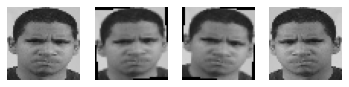

In [5]:
ex_img = p.read_and_resize_mux_image('../datasets/MuxspaceDataset/images/' + str(mux.iloc[0]["image"]))
augmented_images = p.augment(ex_img, normalize_tensors=False)
p.plot_augmented_images(augmented_images)

#### FER

0.9450980392156862
0.0
torch.Size([3, 48, 48])
0.929883406959895
0.0
torch.Size([3, 48, 48])
0.9257465302416262
0.0
torch.Size([3, 48, 48])
0.9450980392156862
0.0
torch.Size([3, 48, 48])


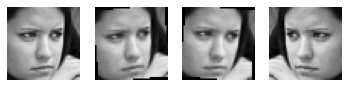

In [6]:
ex_img = p.read_and_resize_fer_image(fer.iloc[-1][" pixels"])
augmented_images = p.augment(ex_img, normalize_tensors=False)
p.plot_augmented_images(augmented_images)

#### KDEF

0.5607843137254902
0.023529411764705882
torch.Size([3, 48, 48])
0.5600118526883836
0.0
torch.Size([3, 48, 48])
0.552003278996781
0.0
torch.Size([3, 48, 48])
0.5607843137254902
0.023529411764705882
torch.Size([3, 48, 48])


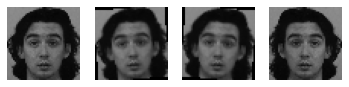

In [7]:
ex_img = p.read_and_resize_kdef_image(kdef.iloc[-1]["img_path"])
augmented_images = p.augment(ex_img, normalize_tensors=False)
p.plot_augmented_images(augmented_images)

### Augumentation and Saving as tensors
1. Save all the original images to make sure we don't undersample the original dataset
2. Save the augmented images for Mux
3. Save the augmented images for KDEF
4. Save the augmented images for FER

In [8]:
# Path to save processed tensor for combined training and validation sets
train_path = '../ProcessedData/combined/train/'
val_path   = '../ProcessedData/combined/validate/'
test_path  = '../ProcessedData/combined/test/'

fer_test_path  = '../ProcessedData/Testing/FER_test/'    # Path for only FER test set
mux_test_path  = '../ProcessedData/Testing/Mux_test/'    # Path for only Mux test set
kdef_test_path = '../ProcessedData/Testing/KDEF_test/'   # Path for only KDEF test set

#### Save original data

In [9]:
# Current count 
train_count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(mux_train, 'mux', train_path, train_count)

Finished saving to ../ProcessedData/combined/train/
[176, 0, 14, 3987, 187, 257, 4807]


In [10]:
p.save_dataset_as_tensors(fer_train, 'fer', train_path, train_count)

Finished saving to ../ProcessedData/combined/train/
[3643, 0, 3598, 10279, 4440, 3058, 9145]


#### Save original and augmented KDEF data
- 3 additional augmentations for KDEF

In [11]:
p.augment_kdef(kdef_train, train_path, 12000, train_count)

Finished saving augmented images to ../ProcessedData/combined/train/
[4819, 0, 4774, 11455, 5612, 4230, 10317]


#### Augument Mux
- 3 additional augmentations for Muxspace dataset
- Does not augment class 3 and 6 because they already have a lot of images

In [12]:
p.augment_mux(mux_train, train_path, 12000, train_count)

Finished saving augmented images to ../ProcessedData/combined/train/
[5347, 0, 4816, 11455, 6173, 5001, 10317]


#### Augment FER
- Lastly, augment FER until cutoff to balance images in each class

In [13]:
p.augment_fer(fer_train, train_path, 12000, train_count)

Finished saving augmented images to ../ProcessedData/combined/train/
[12000, 0, 12000, 12000, 12000, 12000, 12000]


#### Save the combined validation and test sets

In [14]:
# Validation
val_count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(mux_val, 'mux', val_path, val_count)
p.save_dataset_as_tensors(fer_val, 'fer', val_path, val_count)
p.save_kdef_as_tensors(kdef_val, val_path, val_count)

# Combined Test set
test_count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(mux_test, 'mux', test_path, test_count)
p.save_dataset_as_tensors(fer_test, 'fer', test_path, test_count)
p.save_kdef_as_tensors(kdef_test, test_path, test_count)

Finished saving to ../ProcessedData/combined/validate/
[38, 0, 3, 854, 40, 55, 1030]
Finished saving to ../ProcessedData/combined/validate/
[781, 0, 771, 2202, 952, 655, 1960]
Finished saving to ../ProcessedData/combined/validate/
[844, 0, 834, 2265, 1015, 718, 2023]
Finished saving to ../ProcessedData/combined/test/
[38, 0, 4, 855, 41, 56, 1031]
Finished saving to ../ProcessedData/combined/test/
[781, 0, 773, 2204, 953, 657, 1961]
Finished saving to ../ProcessedData/combined/test/
[844, 0, 836, 2267, 1016, 720, 2024]


#### Save individual test sets for each dataset
- For benchmarking purposes

In [15]:
# FER
fer_count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(fer_test, 'fer', fer_test_path, fer_count)

# Mux
mux_count = [0, 0, 0, 0, 0, 0, 0]
p.save_dataset_as_tensors(mux_test, 'mux', mux_test_path, mux_count)

# KDEF
kdef_count = [0, 0, 0, 0, 0, 0, 0]
p.save_kdef_as_tensors(kdef_test, kdef_test_path, kdef_count)

Finished saving to ../ProcessedData/Testing/FER_test/
[743, 0, 769, 1349, 912, 601, 930]
Finished saving to ../ProcessedData/Testing/Mux_test/
[38, 0, 4, 855, 41, 56, 1031]
Finished saving to ../ProcessedData/Testing/KDEF_test/
[63, 0, 63, 63, 63, 63, 63]
